In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn import datasets
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True) #id'ye ihtiyacımız yok, Unnamed: 32 de hiçbir bilgi içermiyor

In [6]:
diagnosis_mapping = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)  #Burada 'M' ve 'B'yi 0 ve 1'e map ediyoruz

In [7]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

C:\Users\Abra\AppData\Local\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


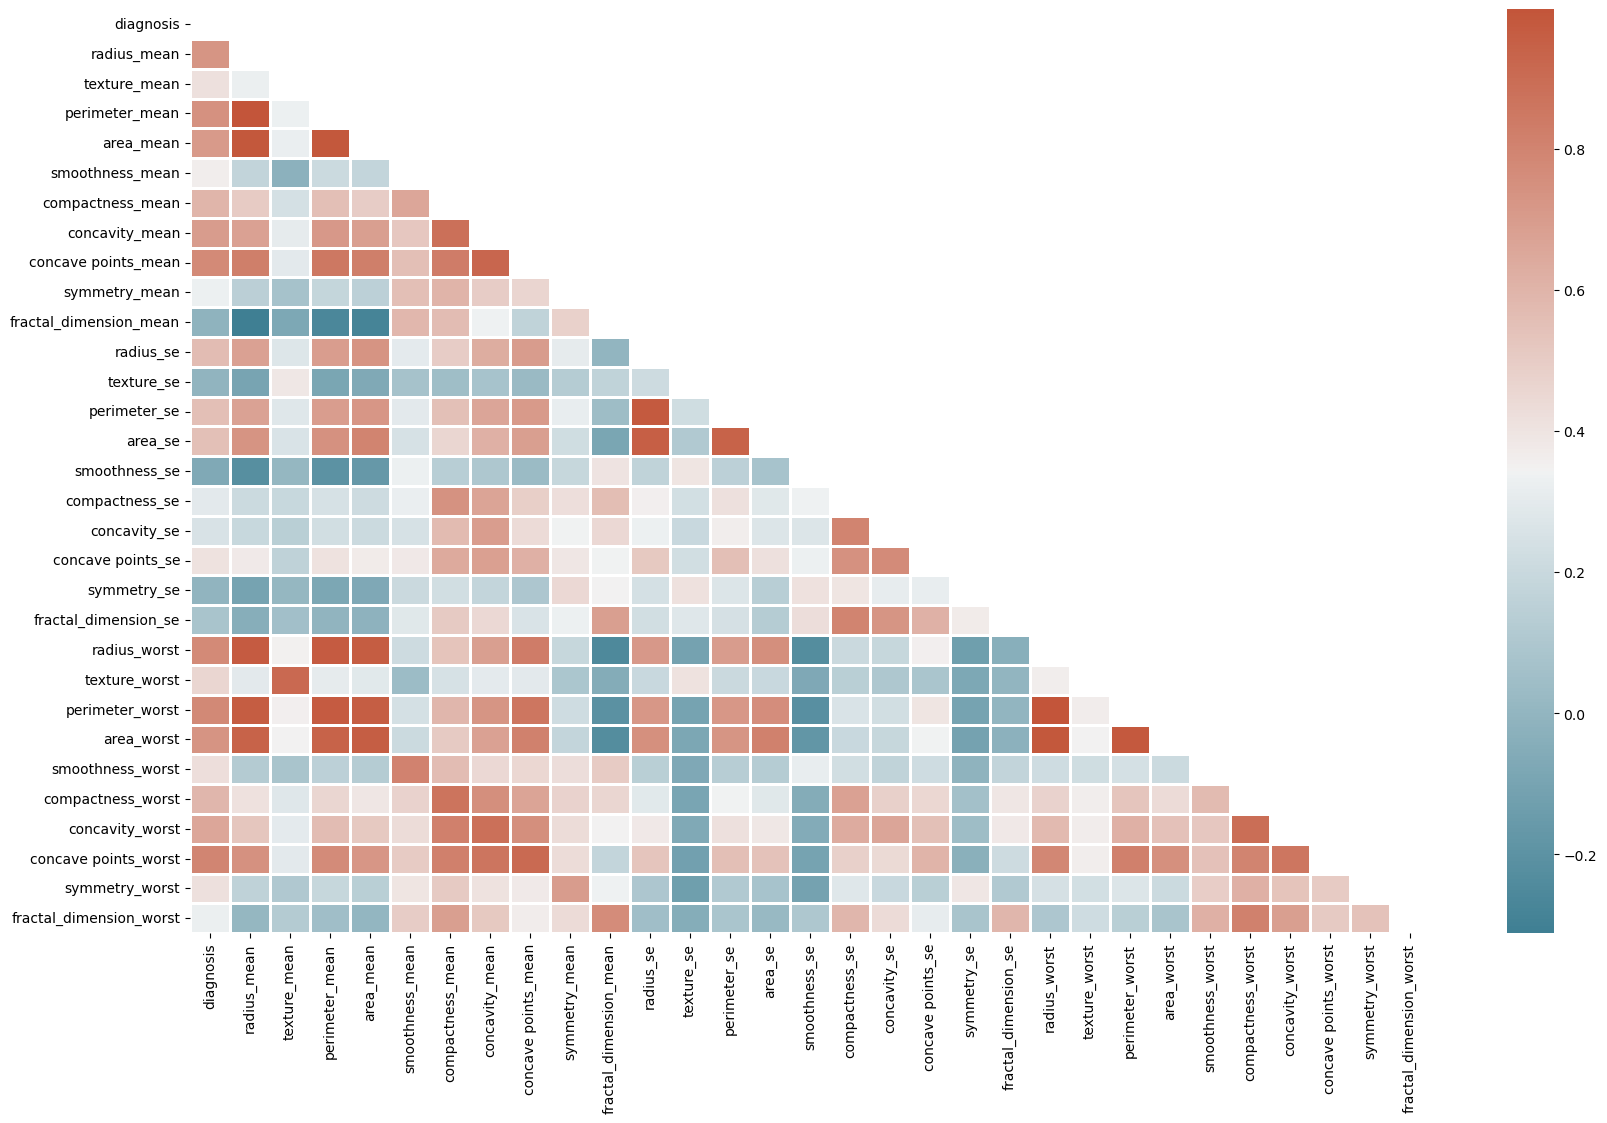

In [8]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) #Correlation matrisinin upper triangle değerleri gözükmesin diye üst üçgeni kapattım
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

In [9]:
corr_matrix = corr.mask(mask)
toDrops= [x for x in corr_matrix.columns if any(corr_matrix[x] > 0.90)]
df = df.drop(toDrops, axis = 1)
print(f"New data frame's column number is: {df.shape[1]}")

New data frame's column number is: 21


In [10]:
#Feature sayımız 32'den 21'e düştü

In [11]:
#Şimdi scaling işlemini yapalım:

In [12]:
#Önce verimizi ayıralım

In [13]:
X = df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [15]:
#Şimdi PCA ile boyut indirgeyelim:

In [16]:
pca = decomposition.PCA(n_components=5)
pca.fit(X)
components = pca.transform(X)

In [17]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [18]:
#verimizi train_test_split fonksiyonu ile eğitim ve test kümesine ayırıyoruz:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(components, y, test_size=0.20,random_state=0,shuffle=False)

In [20]:
#Şimdi burada ANN modeli için gerekli layerleri(katmanları) kuruyoruz.

In [21]:
from tensorflow.keras.layers import BatchNormalization

ann =Sequential()

#Input layer otomatik olarak ekleniyor. Burada 30 neuronlu ilk hidden layeri kuruyoruz.
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#İkinci 30 neuronlu hidden layeri kuruyoruz.
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#Binary Classification yapacak output layeri kuruyoruz.
ann.add(Dense(units = 1,activation = 'sigmoid'))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# ANN modelini, adam optimizer kullanarak stochastic gradient descent ile compile ediyoruz.
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#Modeli, batch_size = 32 olacak şekilde train ediyoruz.
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

In [ ]:
ann.summary()

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
y_pred = ann.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

In [ ]:
# Confusion Matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()